# Fashion Item Recognition using Fashion_MNIST Data set

### Importing Libraries

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential

### Loading Dataset

In [15]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

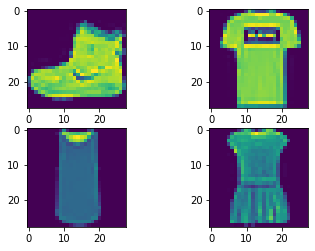

In [16]:
for i in range(4):
    plt.subplot(220+1+i)
    plt.imshow(x_train[i])
    

In [17]:
x_train=x_train.reshape((x_train.shape[0],28,28,1)).astype("float32")
x_test=x_test.reshape((x_test.shape[0],28,28,1)).astype("float32")
# Normalise the Image
x_train=x_train/255
x_test=x_test/255
    

## One Hot Encoding on Target Class

In [18]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_classes=y_test.shape[1]

def cnn_model():
    model=Sequential()
    model.add(tf.keras.layers.Conv2D(32,(5,5),activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128,activation="relu"))
    model.add(tf.keras.layers.Dense(num_classes,activation="sigmoid"))
    
    # Compile the Model
    model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
    
    return model

model=cnn_model()
# Train the model
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10,batch_size=64)

# save the model
model.save("FashionMNIST.h5")

#Final Evaluation of the model
err= model.evaluate(x_test,y_test,verbose=0)
print("CNN Error : %.2f%%" % (100-err[1]*100))

    
    

Epoch 1/10
938/938 [==============================] - 24s 21ms/step - loss: 0.7908 - accuracy: 0.7214 - val_loss: 0.3960 - val_accuracy: 0.8606
Epoch 2/10
938/938 [==============================] - 19s 20ms/step - loss: 0.3947 - accuracy: 0.8555 - val_loss: 0.3487 - val_accuracy: 0.8751
Epoch 3/10
938/938 [==============================] - 18s 19ms/step - loss: 0.3376 - accuracy: 0.8768 - val_loss: 0.3160 - val_accuracy: 0.8886
Epoch 4/10
938/938 [==============================] - 19s 20ms/step - loss: 0.3069 - accuracy: 0.8879 - val_loss: 0.3117 - val_accuracy: 0.8856
Epoch 5/10
938/938 [==============================] - 18s 20ms/step - loss: 0.2901 - accuracy: 0.8918 - val_loss: 0.2895 - val_accuracy: 0.8924
Epoch 6/10
938/938 [==============================] - 18s 20ms/step - loss: 0.2732 - accuracy: 0.8990 - val_loss: 0.2835 - val_accuracy: 0.8973
Epoch 7/10
938/938 [==============================] - 19s 20ms/step - loss: 0.2570 - accuracy: 0.9026 - val_loss: 0.2707 - val_accuracy:

### Prediction

In [30]:
results={
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneacker",
    8:"Bag",
    9:"AnkleBoot"
    
}
from keras.preprocessing import image
import numpy as np

def load(filename):
    img = image.load_img(filename, grayscale=True, target_size=(28, 28))
    img=np.expand_dims(img, axis=0)
    img=np.array(img)
    img = img.reshape(1, 28, 28, 1).astype('float32')
    img = img / 255.0
    
    return img



img = load('FMNIST_sample_images/tshirt.jpeg')
pred=model.predict_classes([img])[0]
print("The Item is", results[pred])



The Item is Shirt
